# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- fbprophet
    - https://facebook.github.io/prophet/
- mac(m1)
    - 윈도우 유저는 visual C++ Build Tool을 먼저 설치한다.
    - https://visualstudio.microsoft.com/ko/visual-cpp-build-tools/
    - conda install pandas-datareader
    - conda install -c conda-forge fbprophet
    - pip install fbprophet

In [3]:
from pandas_datareader import data
from fbprophet import Prophet

---

## 함수(def)의 기초

In [4]:
def test_def(a, b):
    return a + b

In [6]:
c = test_def(2, 3)
c

5

In [7]:
5 + c

10

- 가장 기초적인 모양의 def 정의
- 이름(test_def)과 같이 입력 인자(a, b)를 정해준다.
- 출력(return)을 작성

In [8]:
#  전역변수(global)
a = 1
def edt_a(i):
    # 지역변수(local)
    global a
    a = i
    

In [13]:
edt_a(2)
a

2

- global 변수를 def 내에서 사용하고 싶다면 global 로 선언

In [11]:
def edit_a(i):
    a = i

In [14]:
edit_a(5)
print(a)

2


- def 내에서의 변수롸 밖에서의 변수는 같은 이름이어도 같은 것이 아니다.

$$ y = asin(2\pi ft + t_0) + b$$

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "sin(2*pi)" + str(freq) + "*t+" + str(startTime) + ")" + str(bias))
    plt.show()

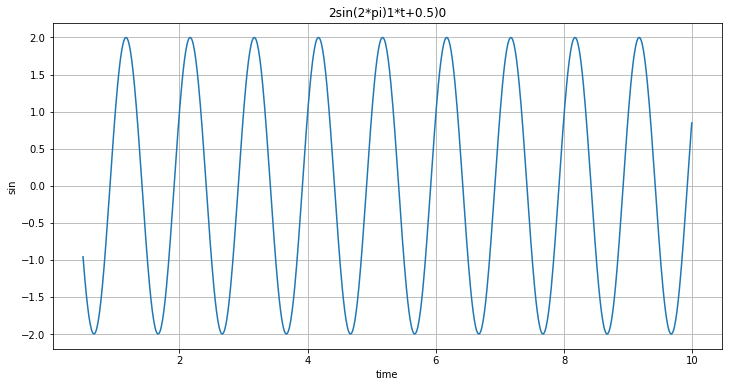

In [24]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

In [30]:
def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "sin(2*pi)" + str(freq) + "*t+" + str(startTime) + ")" + str(bias))
    plt.show()

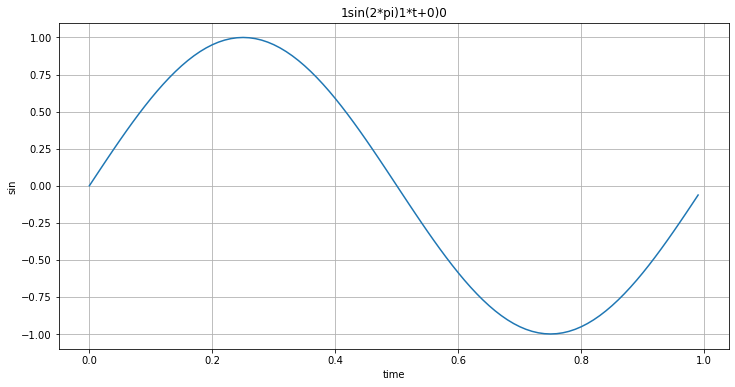

In [31]:
plotSinWave()

## 내가 만든 함수 import
- drawSinWave.py

In [17]:
%%writefile ./drawSinWave.py

import matplotlib.pyplot as plt
import numpy as np

def plotSinWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title("한글 테스트" + str(amp) + "sin(2*pi)" + str(freq) + "*t+" + str(startTime) + ")" + str(bias))
    plt.show()

Overwriting ./drawSinWave.py


In [18]:
import drawSinWave as dS

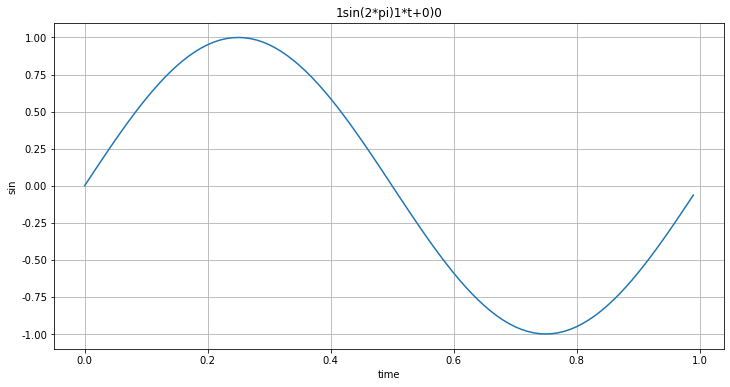

In [19]:
dS.plotSinWave()

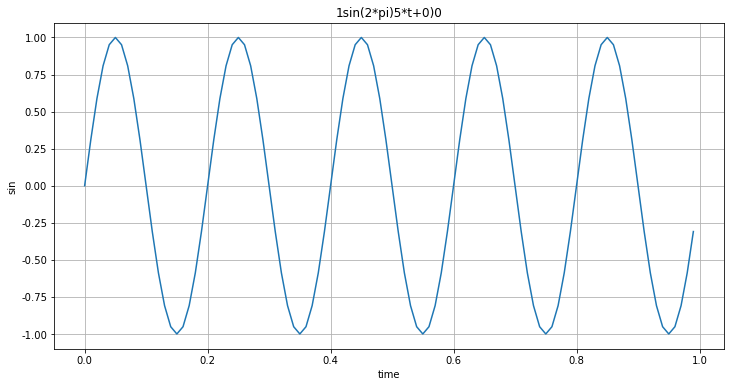

In [20]:
dS.plotSinWave(freq = 5)

## 그래프 한글 설정

In [59]:
%%writefile ./set_matplotlib_hangul.py
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

if platform.system() == "Windows":# Window
    plt.rc("font", family= "Malgun Gothic")
elif platform.system() == 'Darwin': # Mac
    plt.rc("font", family= "Malgun Gothic")
else: #linux
    plt.rc("font", family= "NanumGothic")

# 그래프에 마이너스 표시가 되도록 변경
plt.rcParams['axes.unicode_minus'] = False

Overwriting ./set_matplotlib_hangul.py


In [60]:
import set_matplotlib_hangul

Text(0.5, 1.0, '한글')

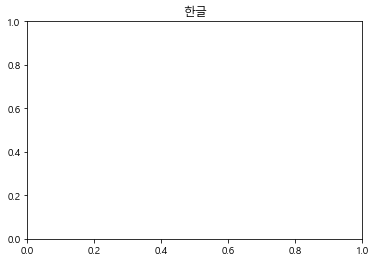

In [61]:
plt.title("한글")

---

## 2. Fbprophet 기초

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.

In [3]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y":result})

In [4]:
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


<AxesSubplot:>

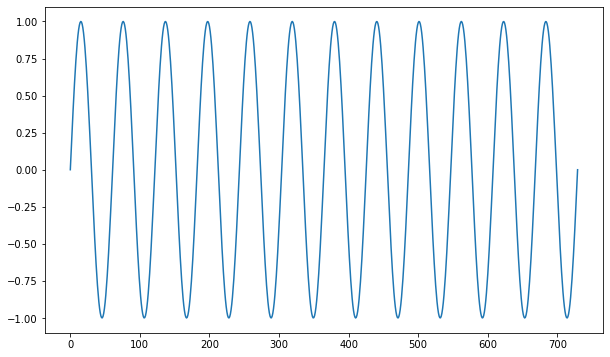

In [5]:
df["y"].plot(figsize=(10, 6))

In [18]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [19]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


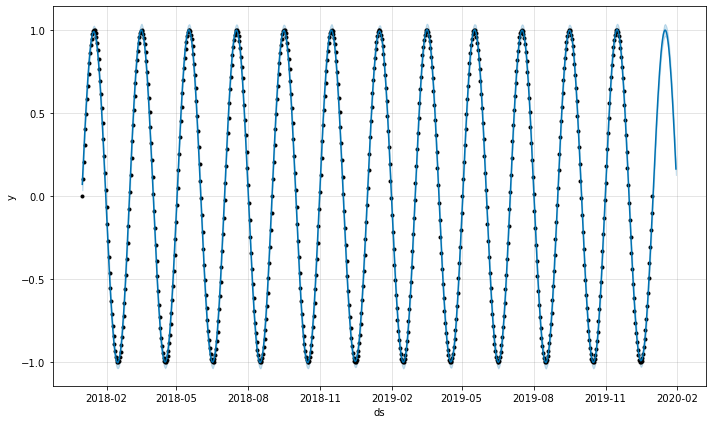

In [20]:
m.plot(forecast);

#### 2.

<AxesSubplot:>

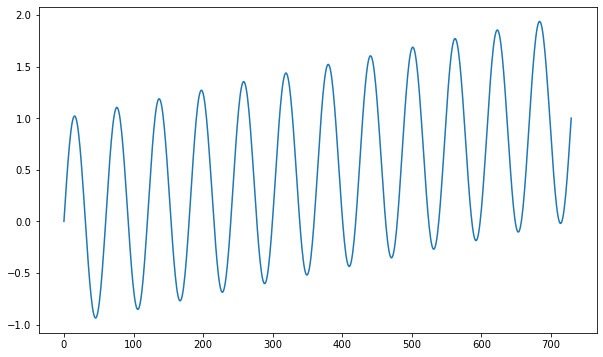

In [22]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y":result})

df["y"].plot(figsize=(10, 6))

C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


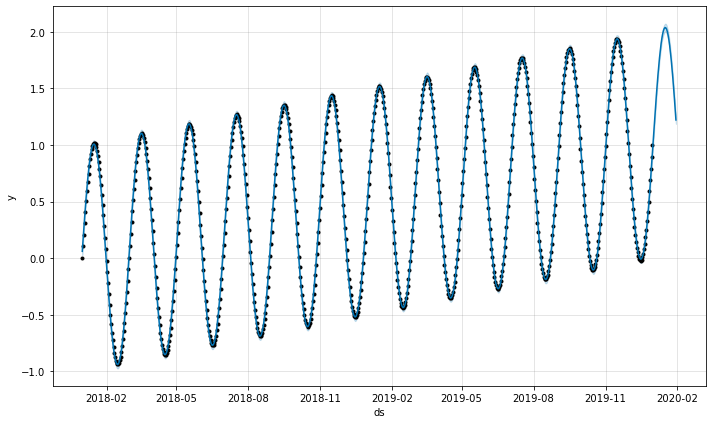

In [24]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

#### 3.

<AxesSubplot:>

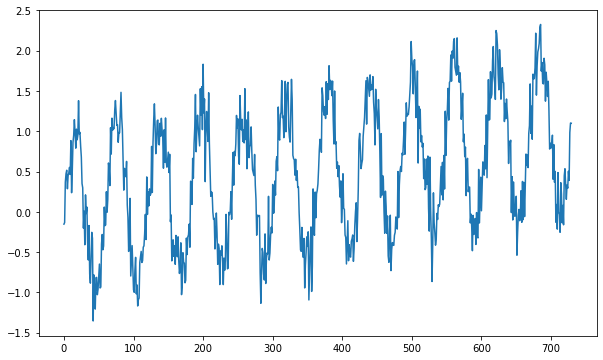

In [28]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y":result})

df["y"].plot(figsize=(10, 6))

C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


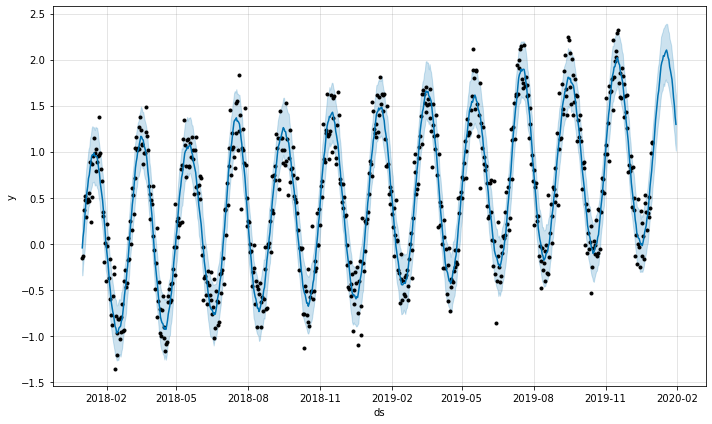

In [29]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast);

---

## 3.시계열 데이터 실전 보기

- https://pinkwink.kr/

In [39]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

%matplotlib inline

In [4]:
pinkwink_web = pd.read_csv(
    "./data/05_PinkWink_Web_Traffic.csv", 
    encoding="utf-8", 
    thousands=",", 
    names=["date", "hit"],
    index_col=0
)
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<AxesSubplot:xlabel='date'>

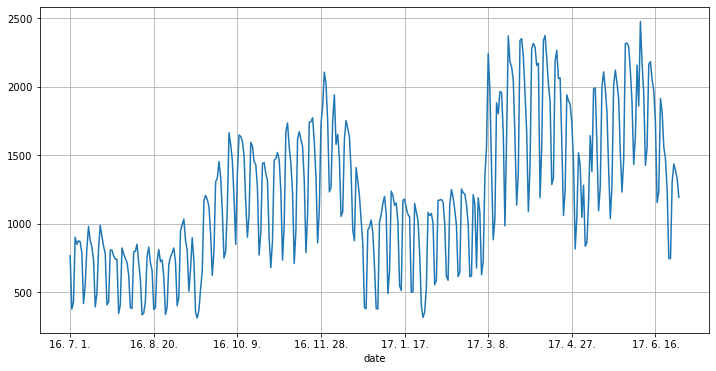

In [6]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(figsize=(12, 6), grid=True)

In [14]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0,time[-1], 1000)

In [15]:
# 에러를 계산할 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y)) ** 2)

In [16]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

In [17]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

3.687814133216257e-13
4.086496742212609e-13
2.691107610725377e-13
6.318839484253022e-06


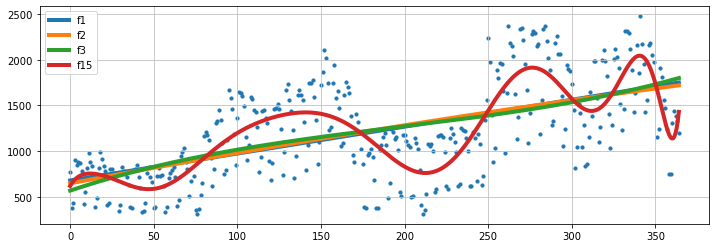

In [18]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label="f1")
plt.plot(fx, f2(fx), lw=4, label="f2")
plt.plot(fx, f3(fx), lw=4, label="f3")
plt.plot(fx, f15(fx), lw=4, label="f15")

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [19]:
df = pd.DataFrame({"ds":pinkwink_web.index, "y":pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [21]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [22]:
# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [24]:
# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다.
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,896.576571,673.852444,1103.244249
421,2017-08-26,481.544412,265.288569,708.847034
422,2017-08-27,614.212001,418.354839,824.458218
423,2017-08-28,1166.966207,966.983461,1382.915119
424,2017-08-29,1203.000155,1005.732191,1412.207882


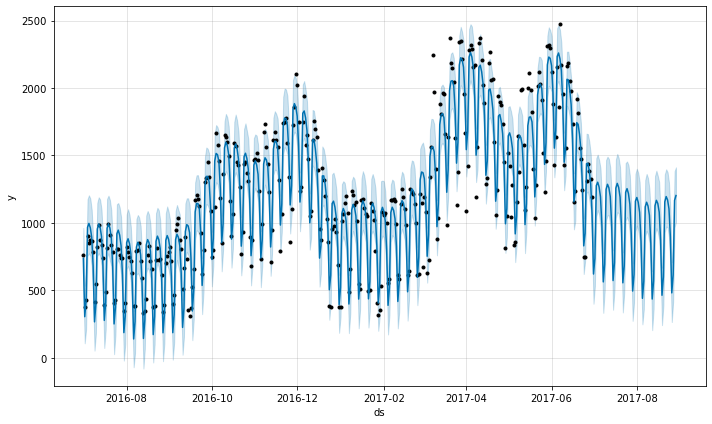

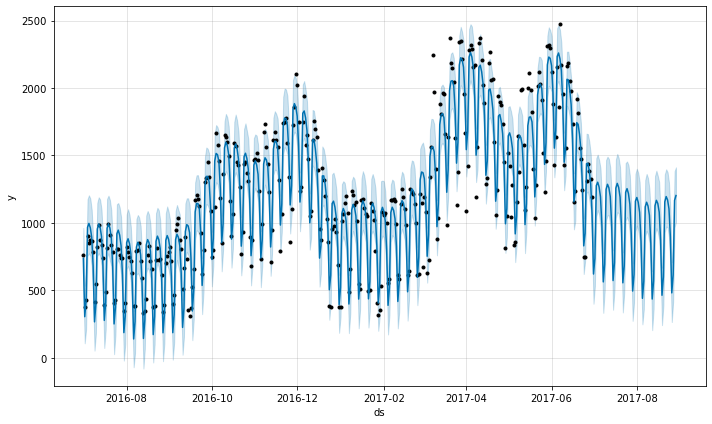

In [25]:
m.plot(forecast)

C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Anaconda3\envs\ds_study\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


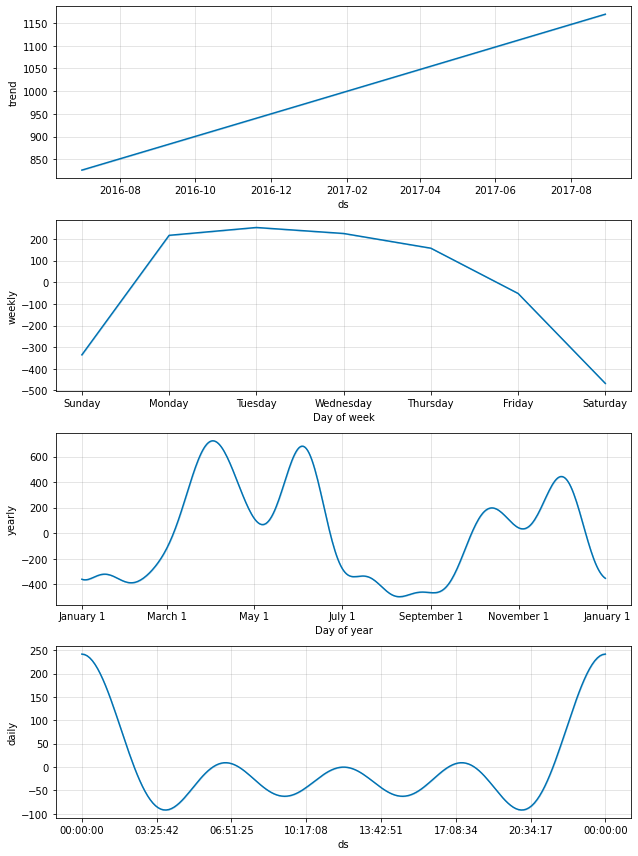

In [27]:
m.plot_components(forecast);

---

## 4. 주식 데이터 fbprophet으로 분석하기

#### 1. yahoo finance
- https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1

In [32]:
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://finance.yahoo.com/quote/035420.KS/history?p=035420.KS&guccounter=1"
req = Request(url, headers={"User-Agent":"Chrome"})
page = urlopen(req).read()
soup = BeautifulSoup(page, "html.parser")
table = soup.find("table")
df_raw = pd.read_html(str(table))[0]
df_raw.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 11, 2022",311000.00,313000.00,308000.00,313000.00,313000.00,502976
1,"Apr 08, 2022",322000.00,324500.00,311500.00,316500.00,316500.00,626173
2,"Apr 07, 2022",323000.00,328500.00,321000.00,321000.00,321000.00,493204
3,"Apr 06, 2022",336500.00,338000.00,329000.00,330000.00,330000.00,647201
4,"Apr 05, 2022",340500.00,343000.00,338000.00,342500.00,342500.00,389951


In [35]:
# fbprophet을 사용하는 형식에 맞춰준 뒤, 맨 마지막 NaN 값이 있어서 제외
df_tmp = pd.DataFrame({"ds":df_raw["Date"], "y":df_raw["Close*"]})
df_target = df_tmp[:-1]
df_target.head()

,ds,y
0,"Apr 11, 2022",313000.00
1,"Apr 08, 2022",316500.00
2,"Apr 07, 2022",321000.00
3,"Apr 06, 2022",330000.00
4,"Apr 05, 2022",342500.00


In [36]:
# hardcopy 후, 날짜를 fbprophet이 요구하는 형태로 변형
df = df_target.copy()
df["ds"] = pd.to_datetime(df_target["ds"], format="%b %d, %Y")
df.head()

,ds,y
0,2022-04-11,313000.00
1,2022-04-08,316500.00
2,2022-04-07,321000.00
3,2022-04-06,330000.00
4,2022-04-05,342500.00


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      100 non-null    datetime64[ns]
 1   y       100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [49]:
# 데이터형 변환 object => float
# df["y"] = df["y"].astype("float")
df = df.astype({"y":"float"})

ValueError: could not convert string to float: '511 Dividend'

In [50]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

ValueError: Unable to parse string "511 Dividend" at position 67

In [51]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

Exception: Model has not been fit.

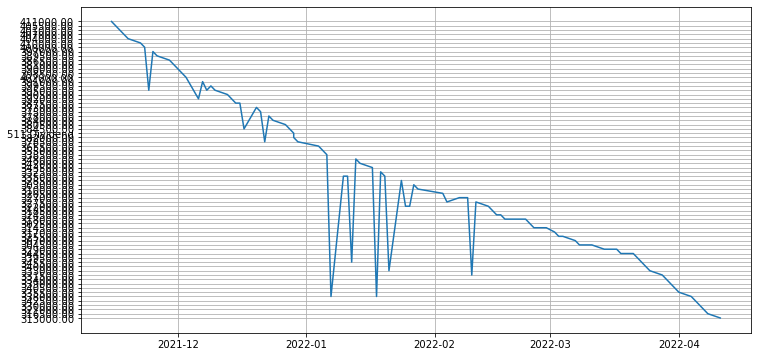

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="real")
plt.grid(True)
plt.show()

TypeError: 'NoneType' object is not subscriptable

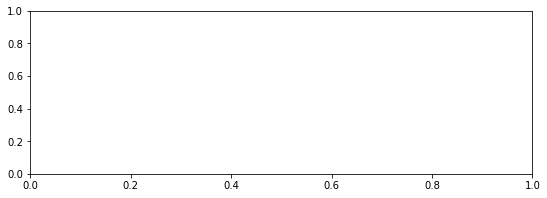

In [46]:
m.plot_components(forecast);